<a href="https://colab.research.google.com/github/tandat-1305/Data-Analysis-with-Python/blob/main/Do_an_PTNN_Py/Thong_ke_suy_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [607]:
#Import Thư viện
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import statistics as sta
import math
from scipy.stats import ttest_1samp
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import pylab

In [608]:
# 1 chiều
def anova(a, b, c):
    df = (a, b, c)
    print("Kiểm định ANOVA:")
    stat, pvalue = stats.f_oneway(a, b, c)
    print("Stat =", stat, "\n", "p value =", pvalue)
    if pvalue < 0.05:
        print("Có bằng chứng thống kê để bác bỏ giả thuyết H0")
    else:
        print("Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0")
    print("-"*50)

def Kolmogorov(data):
    print("Kiểm định Kolmogorov -", data.name)
    k, p = stats.kstest(rvs=data, cdf='norm', args=(np.mean(data), np.std(data)))
    if p > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại không tuân theo luật phân phối chuẩn''')
    print("-"*50)

def bartlett(a, b, c): 
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b, c)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này chứng minh các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này chứng minh mẫu hiện tại không đồng nhất về phương sai''')
    print("-"*50)

def bartlett1(a, b): 
    print("Kiểm định Bartlett:")
    stat, pvalue = stats.bartlett(a, b)
    print("Statistic =", stat, "\n",
          "p value =", pvalue)
    if pvalue > 0.05:
        print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này chứng minh các mẫu hiện tại mang tính đồng nhất về phương sai''')
    else:
        print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. 
         Điều này chứng minh mẫu hiện tại không đồng nhất về phương sai''')
    print("-"*50)

def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]
    print("-"*50)

def hist_plot(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    domain = np.linspace(np.min(data), np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std),color='red')
    plt.hist(data, edgecolor='red', density=True,color='blue')
    plt.show()
    print("-"*50)

def mms(data):
    Min = data.min()
    Max = data.max()
    print("min =", Min)
    print("max =", Max)
    print("max - min =", Max - Min)
    data.std()
    print("-"*50)

def qqplot(data):
    def standadize(data):
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std
    sm.qqplot(standadize(data), line ='45')
    plt.show()

In [609]:
df = pd.read_csv('https://raw.githubusercontent.com/tandat-1305/Data-Analysis-with-Python/main/Do_an_PTNN_Py/Diet_R.csv')

In [610]:
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


Person 25, 26 thiếu dữ liệu

In [611]:
i = df.set_index('Person')
i.loc[[25, 26], 'gender'] = '1'
df2 = i.sort_index()
df2.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
6,0,50,201,66,1,64.0
7,0,37,174,67,1,65.0
8,0,28,176,69,1,60.5
9,0,28,165,70,1,68.1


Phát biểu giả thuyết

$$H_{0}: \mu_{0} = \mu_{1}$$ 
Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau
$$H_{1}: \mu_{0} <> \mu_{1}$$ 
Cân nặng trung bình của trước và sau khi giảm cân là khác nhau


In [612]:
stat, p_value = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0.
Điều này ngụ ý rằng có sự thay đổi về cân nặng trước và sau khi giảm cân''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
Điều này ngụ ý rằng không có sự thay đổi về cân nặng trước và sau khi giảm cân''')

Stat = 2.720972750635475 P_value = 0.0072584136689251115
Có bằng chứng thống kê để bác bỏ giả thuyết H0.
Điều này ngụ ý rằng có sự thay đổi về cân nặng trước và sau khi giảm cân


**Kiểm tra cân nặng giảm chưa**

In [613]:
df2['losingweight'] = df2['pre.weight'] - df2['weight6weeks']
df2.loc[:,'losingweight'] = df2['losingweight']
df2

,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


Losingweight > 0 => Giảm cân thành công

Losingweight < 0 => Giảm cân không thành công

In [614]:
losingweight_suc = df2[df2['losingweight'] > 0]
losingweight_suc

,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


In [615]:
losingweight_fail = df2[df2['losingweight'] < 0]
losingweight_fail

,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight
Person,,,,,,,
15,1,39,168,71,1,71.6,-0.6
27,0,44,174,58,2,60.1,-2.1
40,0,29,169,77,2,77.5,-0.5
50,1,39,180,80,2,81.4,-1.4


Qua bảng trên ta thấy
*   72/76 thành công giảm cân
*   4/76 không thành công


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm')

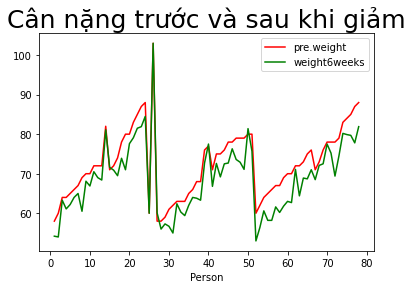

In [616]:
df2[['pre.weight', 'weight6weeks']].plot(color= ['red', 'green'])
plt.title('Cân nặng trước và sau khi giảm', fontsize=25)

# Chọn chế độ ăn kiêng nào là tốt nhất để giảm cân ?

In [617]:
df3 = df2[['Diet', 'losingweight']]
df3

,Diet,losingweight
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [618]:
# Lấy index đã phân loại
diet = df3.groupby('Diet').groups


In [619]:
losingweight = df2['losingweight']
type_1 = losingweight[diet[1]]
type_2 = losingweight[diet[2]]
type_3 = losingweight[diet[3]]

# Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

Sử dụng Shapiro-Wilk test
Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

Kiểm định Kolmogorov - losingweight
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
--------------------------------------------------


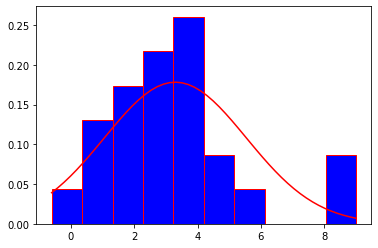

--------------------------------------------------


In [620]:
Kolmogorov(type_1)
hist_plot(type_1)

Kiểm định Kolmogorov - losingweight
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
--------------------------------------------------


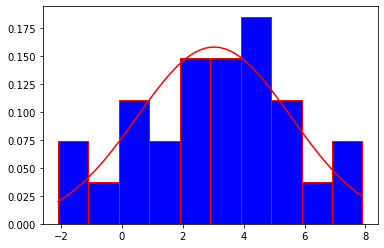

--------------------------------------------------


In [621]:
Kolmogorov(type_2)
hist_plot(type_2)

Kiểm định Kolmogorov - losingweight
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
--------------------------------------------------


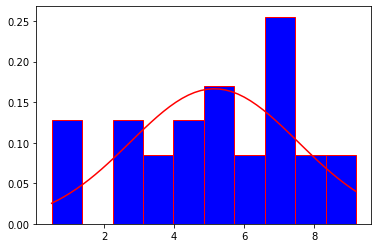

--------------------------------------------------


In [622]:
Kolmogorov(type_3)
hist_plot(type_3)

# Kiểm định tính thuần nhất phương sai 


In [623]:
#Bartleet
bartlett(type_1, type_2, type_3)

Kiểm định Bartlett:
Statistic = 0.337454630479139 
 p value = 0.8447392194944549
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. 
        Điều này chứng minh các mẫu hiện tại mang tính đồng nhất về phương sai
--------------------------------------------------


In [624]:
#ANOVA 1 chiều
anova(type_1, type_2, type_3)

Kiểm định ANOVA:
Stat = 6.197447453165349 
 p value = 0.0032290142385893524
Có bằng chứng thống kê để bác bỏ giả thuyết H0
--------------------------------------------------


Text(0.5, 1.0, 'Diet1 ')

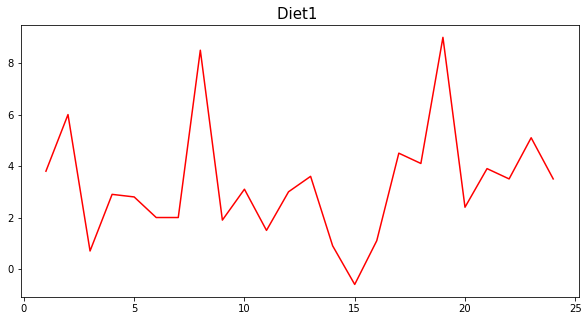

In [625]:
plt.figure(figsize=(10,5))
plt.plot(type_1,color = 'red')
plt.title("Diet1 ", fontsize=15)


Text(0.5, 1.0, 'Diet2 ')

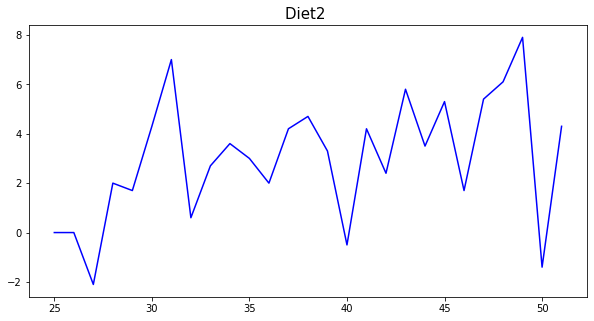

In [626]:
plt.figure(figsize=(10,5))
plt.plot(type_2,color = 'blue')
plt.title("Diet2 ", fontsize=15)


Text(0.5, 1.0, 'Diet3 ')

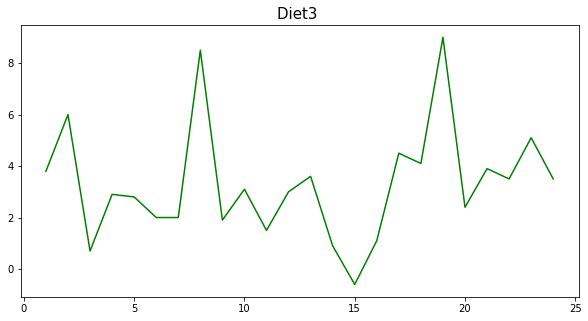

In [627]:
plt.figure(figsize=(10,5))
plt.plot(type_1,color = 'green')
plt.title("Diet3 ", fontsize=15)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Count')

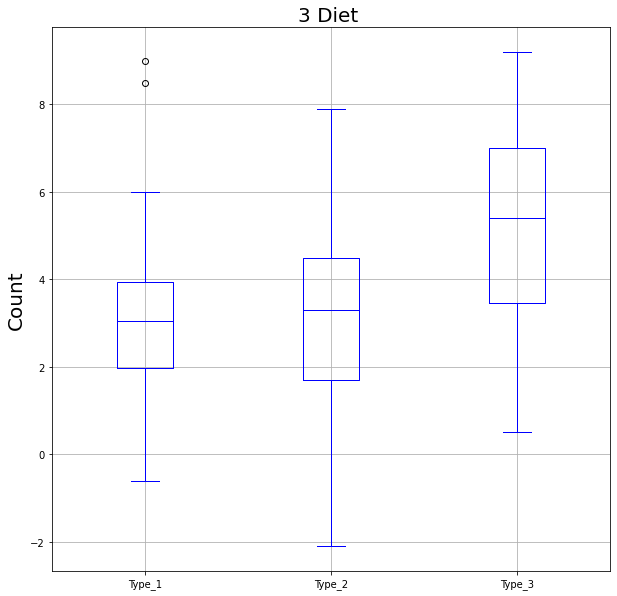

In [628]:
plt.figure(figsize=(10, 10))
plt.title('3 Diet ', fontsize=20)
pd.DataFrame({'Type_1': type_1, 'Type_2': type_2, 'Type_3': type_3}).boxplot(color='blue')
plt.ylabel('Count', fontsize=20)



# Min, Max, Std



In [629]:
print('Diet1')
t1 = mms(type_1)
print('Diet2')
t2 = mms(type_2)
print('Diet3')
t3 = mms(type_3)

Diet1
min = -0.5999999999999943
max = 9.0
max - min = 9.599999999999994
--------------------------------------------------
Diet2
min = -2.1000000000000014
max = 7.900000000000006
max - min = 10.000000000000007
--------------------------------------------------
Diet3
min = 0.5
max = 9.200000000000003
max - min = 8.700000000000003
--------------------------------------------------


In [630]:
Name = ['1', '2', '3']
Range = [type_1.max()-type_1.min(), type_2.max()-type_2.min(), type_3.max()-type_3.min()]
Std = [type_1.std(), type_2.std(), type_3.std()]
table = list(zip(Name, Range, Std))
table = pd.DataFrame(table)
table.columns = ['Type', 'Range', 'Std']
table

,Type,Range,Std
0,1,9.6,2.240148
1,2,10.0,2.523367
2,3,8.7,2.395568


$\Rightarrow$ Loại 2 cho hiệu quả giảm câncân tốt nhất vì có phạm vi và độ lệch chuẩn lớn nhất



# Khác biệt giới tính ảnh hưởng đến giảm cân

In [631]:
df4 = df2[['gender', 'losingweight']]
df4

,gender,losingweight
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [632]:
gen = df4.groupby('gender').groups
gen

{'0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], '1': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [633]:
gen0 = losingweight[gen['0']]
gen1 = losingweight[gen['1']]

# Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa
Sử dụng Shapiro-Wilk test
Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [634]:
# Kiểm tra gen0
stat_gen_0, p_gen_0 = shapiro(gen0)
print('stat=%.3f, p=%.3f' % (stat_gen_0, p_gen_0))
if p_gen_0 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.970, p=0.305
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


Kiểm định Kolmogorov - losingweight
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
--------------------------------------------------


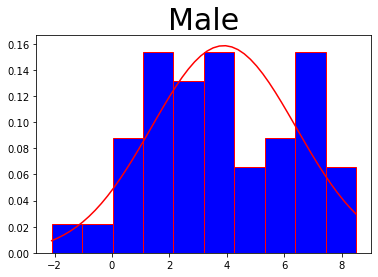

--------------------------------------------------


In [635]:
Kolmogorov(gen0)
plt.title("Male", fontsize=30)
hist_plot(gen0)

In [636]:
# Kiểm tra gen1
stat_gen_1, p_gen_1 = shapiro(gen1)
print('stat=%.3f, p=%.3f' % (stat_gen_1, p_gen_1))
if p_gen_1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.975, p=0.600
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


Kiểm định Kolmogorov - losingweight
Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0.
        Điều này chứng minh rằng các mẫu hiện tại tuân theo luật phân phối chuẩn
--------------------------------------------------


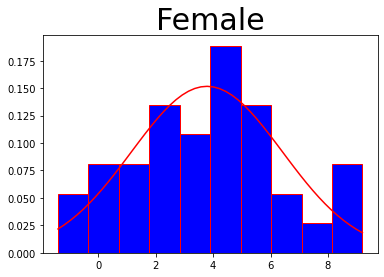

--------------------------------------------------


In [637]:
Kolmogorov(gen1)
plt.title("Female", fontsize=30)
hist_plot(gen1)

# Ảnh hưởng của chế độ ăn kiêng và giới tính đến việc giảm cân
Giả thuyết:
$H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.

$H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [638]:
model_2 = ols('losingweight ~ C(gender)', data=df4).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.222185,1.0,0.033701,0.854833
Residual,501.050764,76.0,NaN,NaN


In [639]:
p = {}
p['mean1'] = np.mean(gen0)
p['mean2'] = np.mean(gen1)
p['score'], p['p_value'] = ttest_1samp(gen0, p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.893023,3.785714,0.279691,0.781088,Chấp nhận H0 với mức ý nghĩa 0.05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


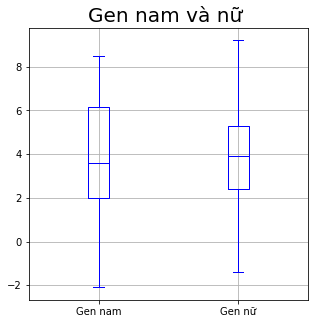

In [640]:
plt.figure(figsize=(5,5))
plt.title('Gen nam và nữ ', fontsize=20)
pd.DataFrame({'Gen nam': gen0, 'Gen nữ': gen1}).boxplot(color='blue')

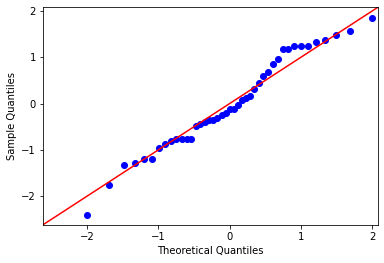

In [645]:
qqplot(gen0)

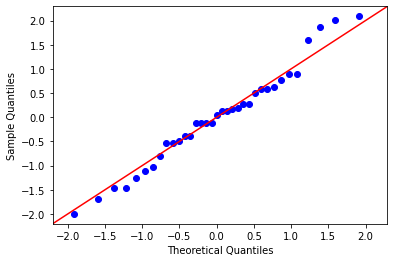

In [642]:
qqplot(gen1)